# Testing the trained U-Net models

## Module imports

In [1]:
#import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
from tqdm import tqdm # progress bar
from torch.optim import Adam
import numpy as np
from skimage import metrics
from PIL import Image
import glob
import os
import matplotlib.pyplot as plt   

# custom modules
from unet import StentDataset, UNet, ImageAugmentation

/home/igor/miniconda3/envs/torch1.10/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Testing model

In [9]:
inputs_path = "/home/igor/Work/CS/PP22/Medical-Noise-Cancellation/data/dataset/test/input"
outputs_path = "data/dataset/results000"
targets_path = "/home/igor/Work/CS/PP22/Medical-Noise-Cancellation/data/dataset/test/groundtruth"

0.0 1.0
0.0 1.0
0.0 1.0


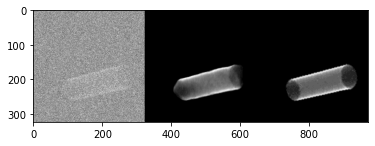

In [ ]:

print(np.min(inp), np.max(inp))
print(np.min(out), np.max(out))
print(np.min(targ), np.max(targ))
plt.imshow(np.concatenate([inp, out, targ], axis=1), cmap='Greys')

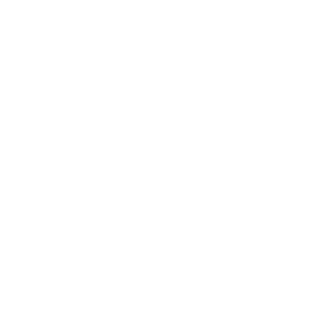

In [ ]:
Image.fromarray(input).convert('RGB')

In [10]:
filenames = [f for f in os.listdir(inputs_path) if os.path.isfile(os.path.join(inputs_path, f))]

n_test_images = 1000
PSNR = 0; PSNR_0 = 0
SSIM = 0; SSIM_0 = 0
delta = 94
probe = None
for filename in tqdm(filenames):
    """input = np.array(Image.open(os.path.join(inputs_path, filename)).convert('L'))
    output = np.array(Image.open(os.path.join(outputs_path, filename)).convert('L'))
    target = np.array(Image.open(os.path.join(targets_path, filename)).convert('L'))"""

    input = np.array(Image.open(os.path.join(inputs_path, filename)))
    output = np.array(Image.open(os.path.join(outputs_path, filename)))[..., 0]
    target = np.array(Image.open(os.path.join(targets_path, filename)))

    inp = input
    out = output
    targ = target
    inp = inp.astype('float32')
    out = out.astype('float32')
    targ = targ.astype('float32')
    inp = (inp - np.min(inp))/(np.max(inp) - np.min(inp) + 1e-6)
    out = (out - np.min(out))/(np.max(out) - np.min(out) + 1e-6)
    targ = (targ - np.min(targ))/(np.max(targ) - np.min(targ) + 1e-6)

    input = inp
    output = out
    target = targ

    input = input[delta:-delta, delta:-delta]
    output = output[delta:-delta, delta:-delta]
    target = target[delta:-delta, delta:-delta]

    PSNR_0 = PSNR_0 + metrics.peak_signal_noise_ratio(target, input)/n_test_images
    SSIM_0 = SSIM_0 + metrics.structural_similarity(target, input)/n_test_images
    PSNR = PSNR + metrics.peak_signal_noise_ratio(target, output)/n_test_images
    SSIM = SSIM + metrics.structural_similarity(target, output)/n_test_images

print()
print("Testing results:")
print(f"PSNR_0: {PSNR_0}")
print(f"SSIM_0: {SSIM_0}")
print(f"PSNR: {PSNR}")
print(f"SSIM: {SSIM}")

100%|██████████| 1000/1000 [01:11<00:00, 13.96it/s]


Testing results:
PSNR_0: 6.874375782549217
SSIM_0: 0.23272361782680745
PSNR: 32.23492097005056
SSIM: 0.9759016981060586
